# Flight Price Prediction

## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

## FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)
print("Import complete")

Import complete


### Loading the dataset

In [2]:
train_df = pd.read_excel("Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Exploratory Data Analysis

In [4]:
#checking shape of dataset
train_df.shape 

(10683, 11)

In [5]:
#checking datatypes of data
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the predictor variables are of object type and only the target variable is numerical in nature

In [6]:
#checking info about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# checking columns of datasets
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Here features Date_of_Journey, Dep_Time, Arrival_Time are of date time type so will convert them to right data type.

In [8]:
###### Preparing and preprocessing data for EDA

In [9]:
# converting the date time features from object to date and time datatype
date_time_cols = ['Date_of_Journey','Dep_Time','Arrival_Time']
for i in date_time_cols:
    train_df[i] = pd.to_datetime(train_df[i])
    
print(train_df.dtypes)

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object


In [10]:
# will be extracting day and month of journey from Date_of_Journey 

train_df['Day_of_journey'] = pd.DatetimeIndex(train_df.Date_of_Journey).day
train_df['Month_of_journey'] = pd.DatetimeIndex(train_df.Date_of_Journey).month

In [11]:
#dropping Date_of_Journey as it is of no use now since we have extracted imp info from it
train_data = train_df.drop(['Date_of_Journey'],axis=1)

In [12]:
#will be extracting hour an minute of departure and arrival from Dep_Time and Arrival_Time features

# train data
train_data['Dep_hour'] = pd.DatetimeIndex(train_data.Dep_Time).hour
train_data['Dep_minute'] = pd.DatetimeIndex(train_data.Dep_Time).minute
train_data['Arrival_hour'] = pd.DatetimeIndex(train_data.Arrival_Time).hour
train_data['Arrival_minute'] = pd.DatetimeIndex(train_data.Arrival_Time).minute

# dropping Dep_Time and Arrival_Time as we need it no more since we have extracted imp info
train_data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)


In [13]:
# extracting hours and minutes from duration variable

dur = list(train_data.Duration)

for i in range(len(dur)):
    if len(dur[i].split()) != 2:   
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"  
        else:
            dur[i] = "0h " + dur[i]          

dur_hours = []
dur_minutes = []
for i in range(len(dur)):
    dur_hours.append(int(dur[i].split(sep = "h")[0])) 
    dur_minutes.append(int(dur[i].split(sep = "m")[0].split()[-1]))  
    
train_data['Duration_hours'] = dur_hours
train_data['Duration_minutes'] = dur_minutes
train_data.drop(['Duration'],axis=1,inplace=True)

In [14]:
# checking dataset
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [15]:
## checking null values in the datasets

In [16]:
train_data.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         1
Additional_Info     0
Price               0
Day_of_journey      0
Month_of_journey    0
Dep_hour            0
Dep_minute          0
Arrival_hour        0
Arrival_minute      0
Duration_hours      0
Duration_minutes    0
dtype: int64

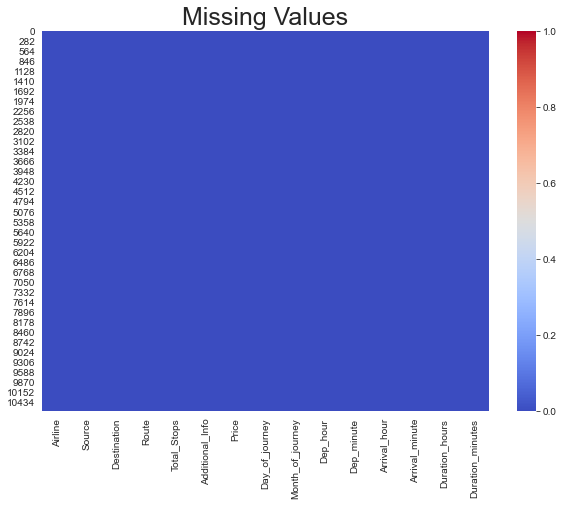

In [17]:
# visualising the missing values 
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(train_data.isnull(),cmap='coolwarm')
plt.show()

There is only one missing value in Route and Total_Stops each  so will be dropping those rows with missing values

In [18]:
train_data.dropna(axis=0,inplace=True)

In [19]:
## will explore more about the data using visualisations different relationships

In [20]:
print("Number of unique values in features: ")
train_data.nunique()

Number of unique values in features: 


Airline               12
Source                 5
Destination            6
Route                128
Total_Stops            5
Additional_Info       10
Price               1870
Day_of_journey         9
Month_of_journey       7
Dep_hour              24
Dep_minute            12
Arrival_hour          24
Arrival_minute        12
Duration_hours        44
Duration_minutes      12
dtype: int64

In [21]:
# analysing numerical variables in train dataset
numerical_features = [feature for feature in train_data.columns if feature not in train_data.select_dtypes("O")] 

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  9
['Price', 'Day_of_journey', 'Month_of_journey', 'Dep_hour', 'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minutes']


In [22]:
# visualising numerical features
train_data[numerical_features].head()

,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45


In [23]:
for i in numerical_features:
    print(f"Total number of unique in {i} : {train_data[i].nunique()}")

Total number of unique in Price : 1870
Total number of unique in Day_of_journey : 9
Total number of unique in Month_of_journey : 7
Total number of unique in Dep_hour : 24
Total number of unique in Dep_minute : 12
Total number of unique in Arrival_hour : 24
Total number of unique in Arrival_minute : 12
Total number of unique in Duration_hours : 44
Total number of unique in Duration_minutes : 12


In [24]:
# checking statistical summary od numerical variables
train_data[numerical_features].describe()

,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


- From the above table we can see the statistical summary of the variables
- The standard deviation small for all the variables other than price which means only prices variable is widely spread and quite far from mean, whereas all other variables are not much spread which means there is not much variation in other variables.
- Mean is also close to median which means the variables are somewhat normally distributed and the data is not much skewed

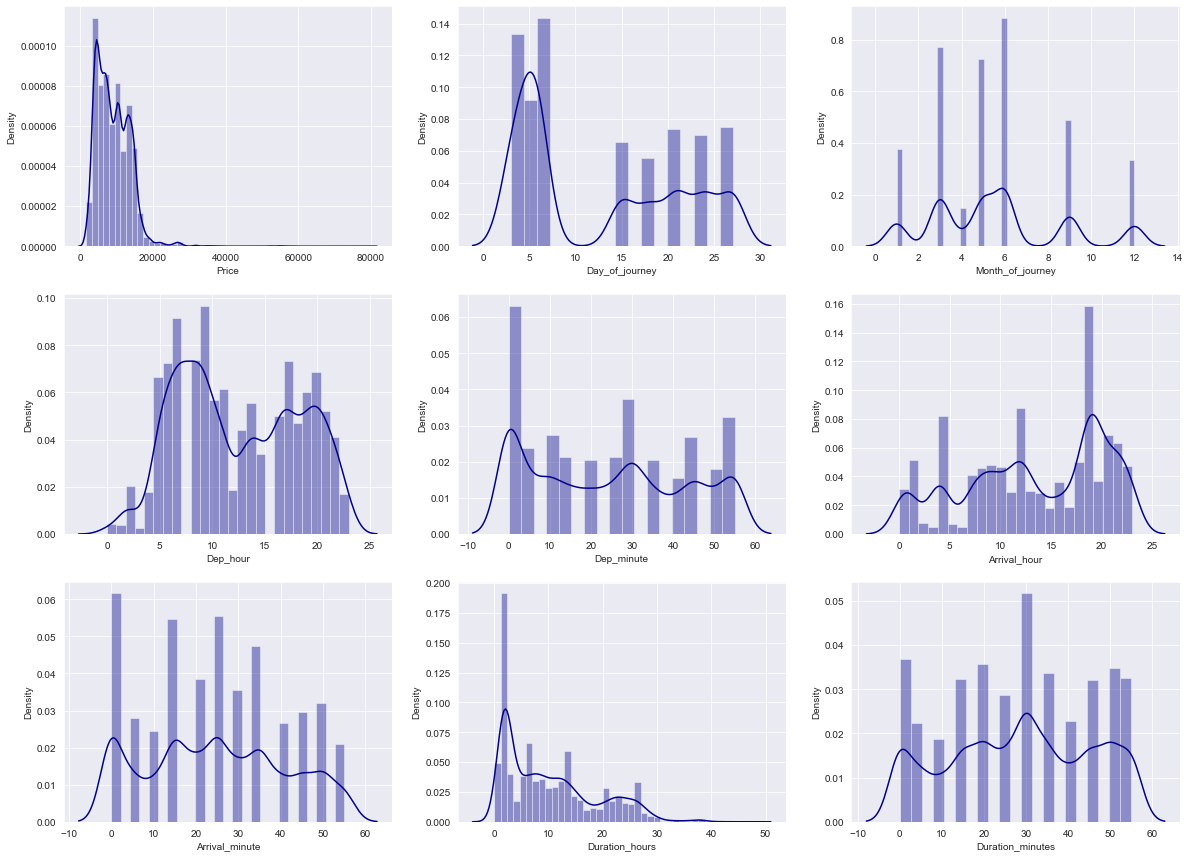

In [25]:
# analysing distribution of the numerical Features by plotting distribution plots
plt.figure(figsize=(20,15))
plot = 1
for var in numerical_features:
    plt.subplot(3,3,plot)
    sns.distplot(train_data[var],color='darkblue')
    plot+=1
plt.show()

- From above plots we can visualise the distribution of the variables.
- Here only price is a continous variable with some amount of skewness
- All other variables are discrete in nature since they have multiple peaks 

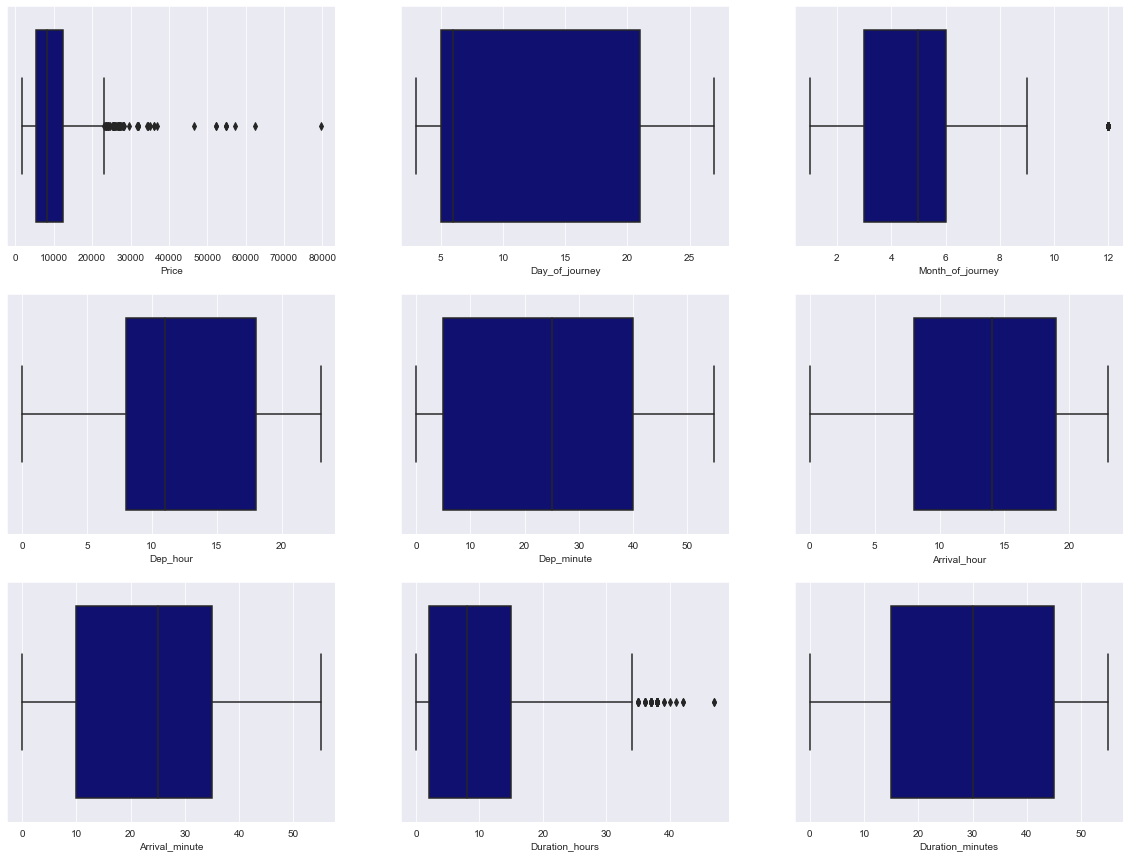

In [26]:
# analysing the spread of data using boxplots through which we can also visualise outliers
plt.figure(figsize=(20,15))
plot = 1

for var in numerical_features:
    plt.subplot(3,3,plot)
    sns.boxplot(x=train_data[var],color='navy')
    plot+=1
plt.show()

There are some outliers in the dataset which will be treating further in feature engineering by transforming and scaling the data which will remove the skewness occuring due to outliers.

In [27]:
# Visualising the numerical variables with price

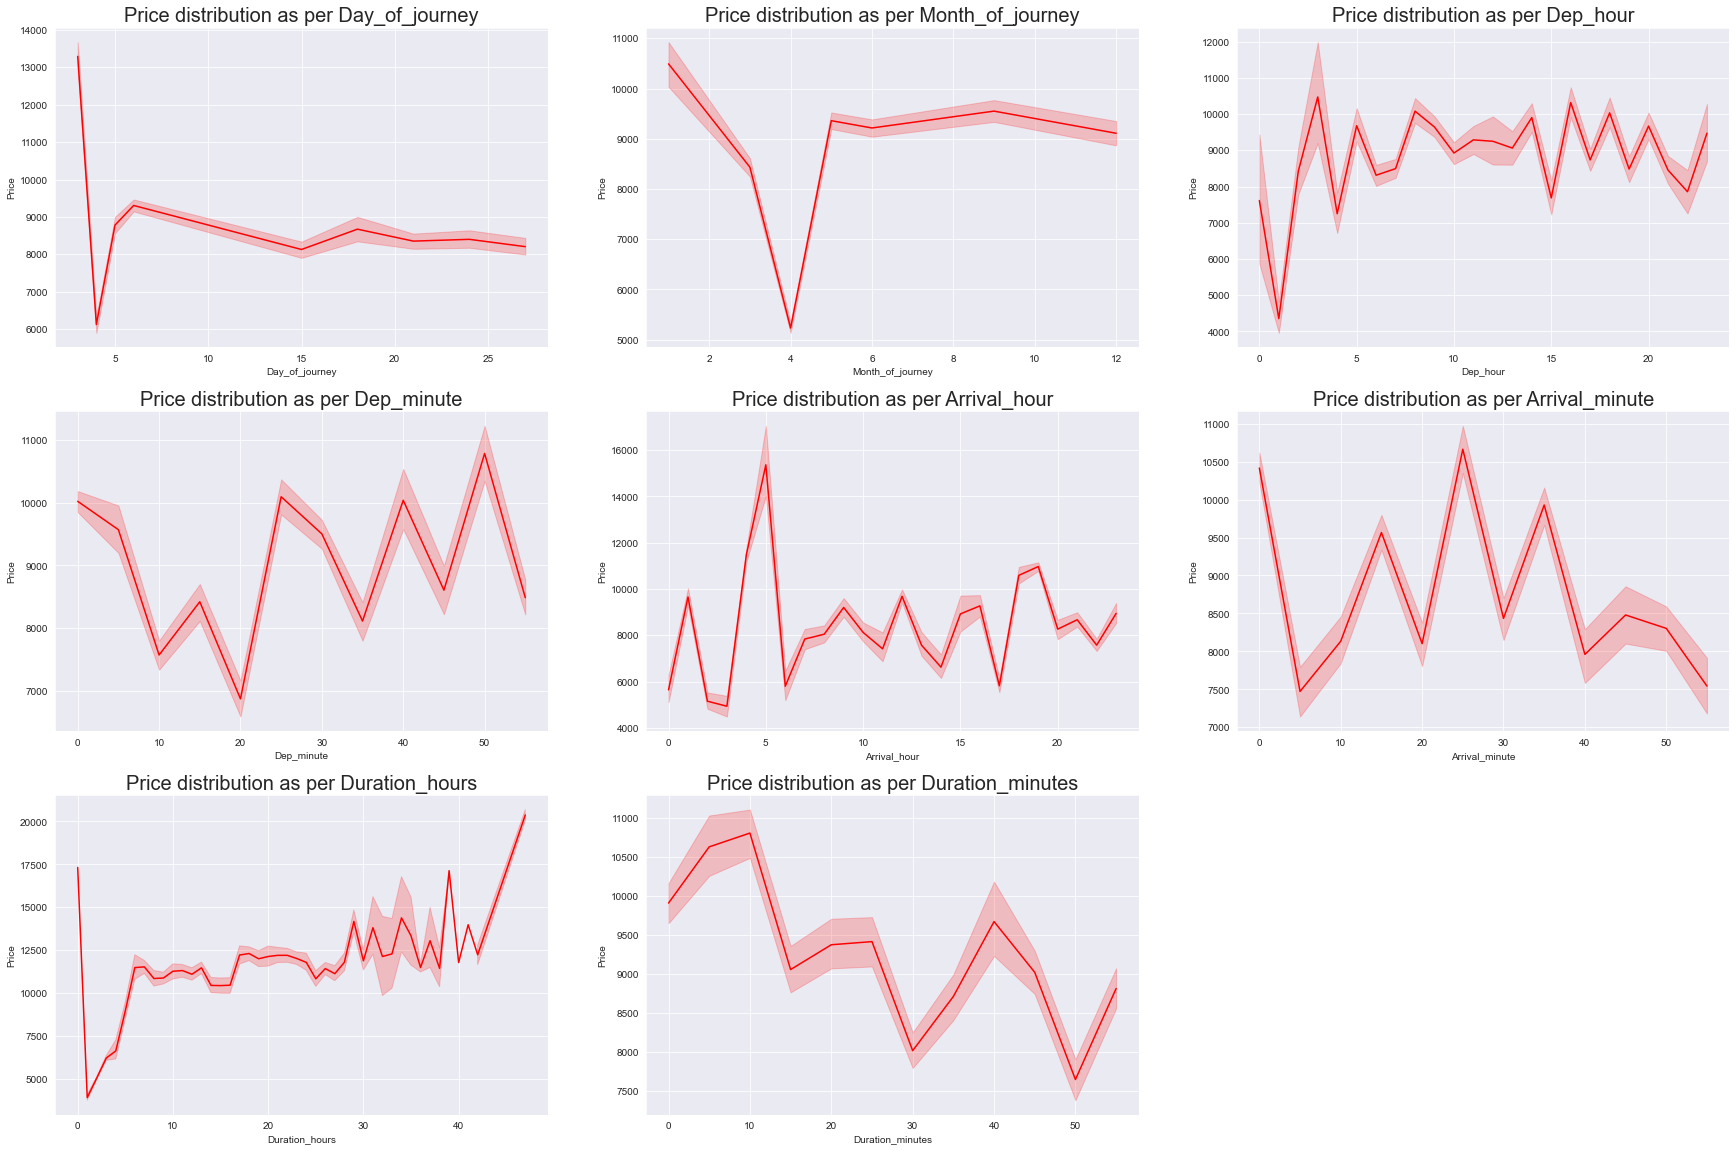

In [28]:
plt.figure(figsize=(30,20))
plot = 1
cols = ['Day_of_journey','Month_of_journey','Dep_hour','Dep_minute','Arrival_hour',
        'Arrival_minute','Duration_hours','Duration_minutes']
for i in cols:
    plt.subplot(3,3,plot)
    sns.lineplot(x=train_data[i],y=train_data.Price,color='red')
    plt.title(f"Price distribution as per {i}",fontsize=20)
    plot+=1
plt.show()

- Flight prices were quite higher in intial days of month but dropped during mid-month
- Flight prices are generally higher in the initial days of the month

- Flight prices were very high before April and dropped in the month of April which again spiked somewhere around June
- Flight prices were generally higher in the intial months and endinging month they drop in mid of the year

- There is no specific relation between the Departure hour and minute as the prices can change any time

- There is no specific relation between the Arrival hour and minute as the prices keep changing and can drop or spike at any time

- Prices increase as the duration hours increase which means if the ticket is for more duration then the price will be high

- As per the duration minutes plot it shows that as the minutes increase prices drops

In [29]:
# analysing categorical variables
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtypes=='O' ] 
print('Number of numerical variables: ', len(categorical_features))
print(categorical_features)

Number of numerical variables:  6
['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [30]:
# visualising categorical features
train_data[categorical_features].head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info


In [31]:
# checking number of categories
for var in categorical_features:
    print("{} has {} categories".format(var,len(train_data[var].unique())))

Airline has 12 categories
Source has 5 categories
Destination has 6 categories
Route has 128 categories
Total_Stops has 5 categories
Additional_Info has 10 categories


In [32]:
#checking unique values in type feature
for i in categorical_features:
    print("Unique values in {} are \n{}".format(i,train_data[i].value_counts()))
    print("-"*30)

Unique values in Airline are 
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
------------------------------
Unique values in Source are 
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
------------------------------
Unique values in Destination are 
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
------------------------------
Unique values in Route are 
DE

In [33]:
# since there is only Trujet category in Airlines which is not there in test dataset so will be dropping it
train_data = train_data[train_data.Airline != 'Trujet']

In [34]:
# checking statistical summary od numerical variables
train_data[categorical_features].describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
count,10681,10681,10681,10681,10681,10681
unique,11,5,6,127,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
freq,3849,4536,4536,2376,5624,8343


- From the above table we can see the statistical summary of categorical variables
- Jet Airways is the most chosen Airline
- Moslty the source of boarding is Delhi 
- Mostly destination is Cochin
- The most frequent route is DEL -> BOM -> COK
- Majorly there is only 1 stop during the journey 

In [35]:
# Will be dropping Route and Total_Stops are related to each other 
# Dropping Additional info column as it does give any specific information
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

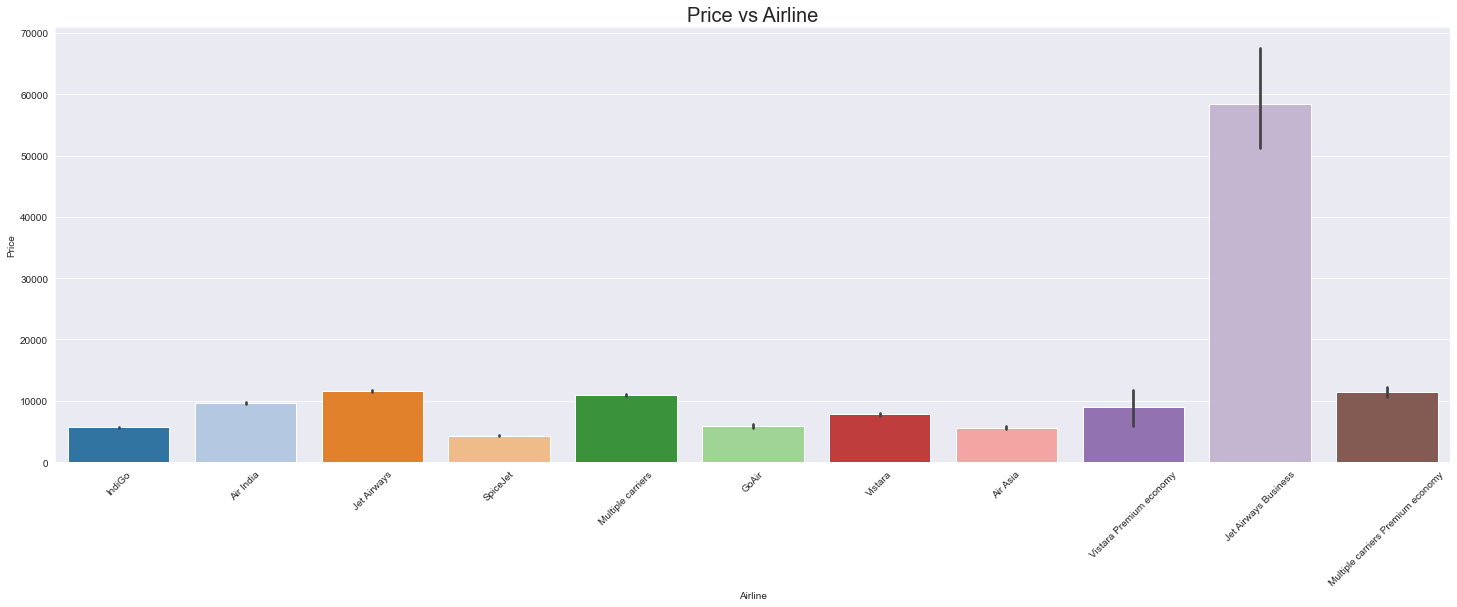

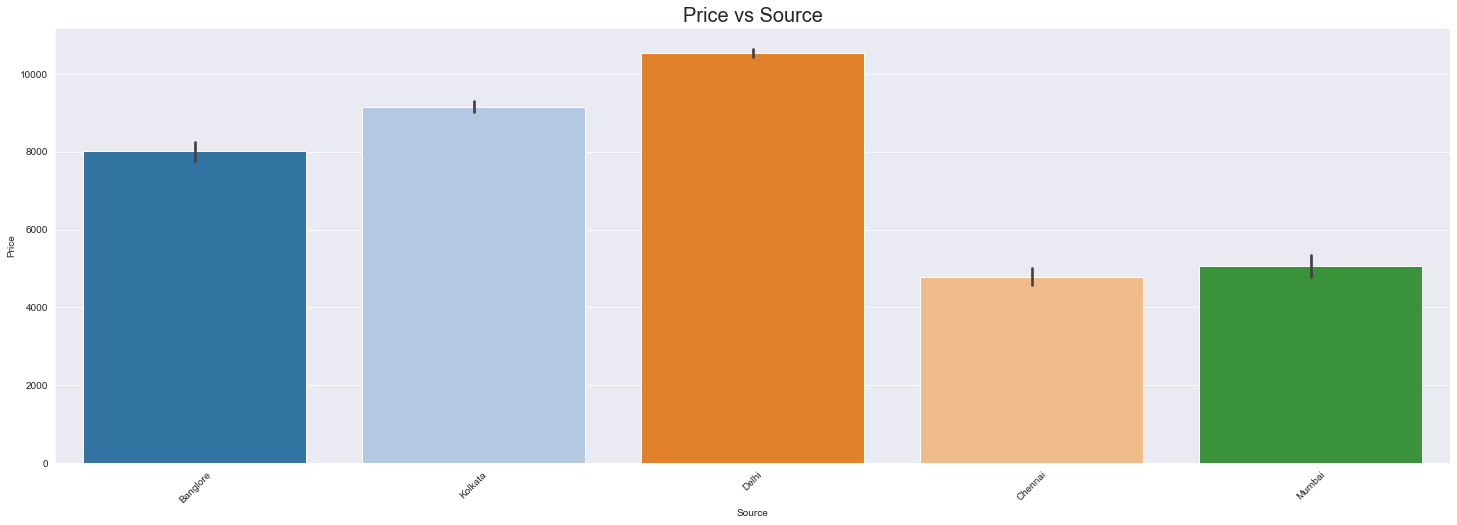

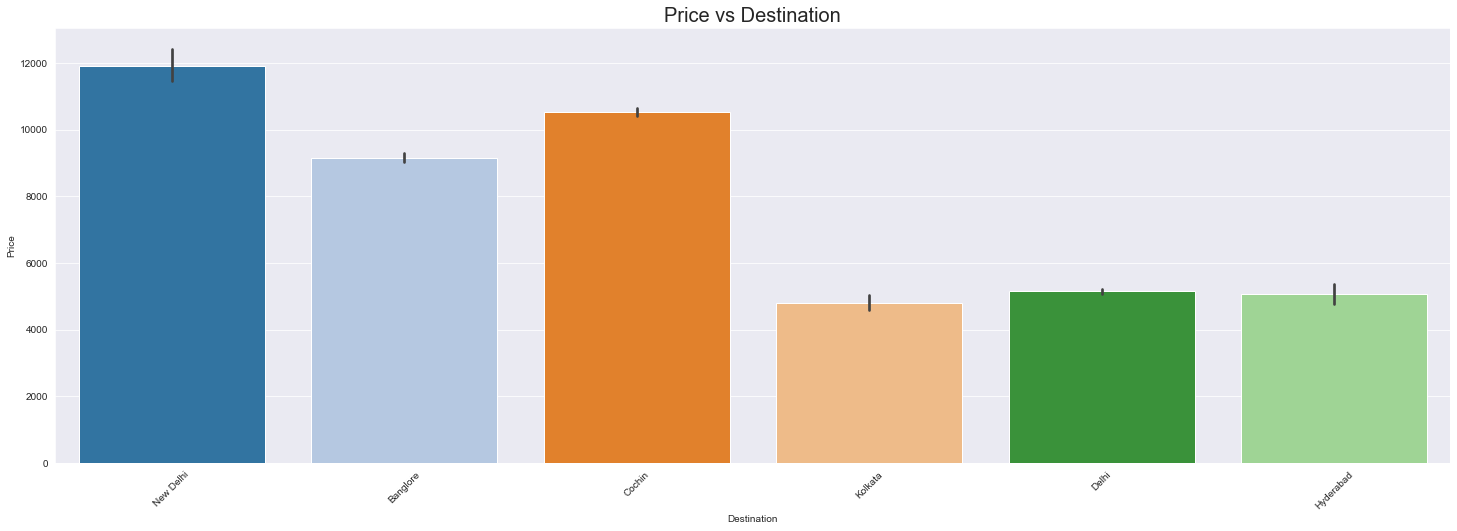

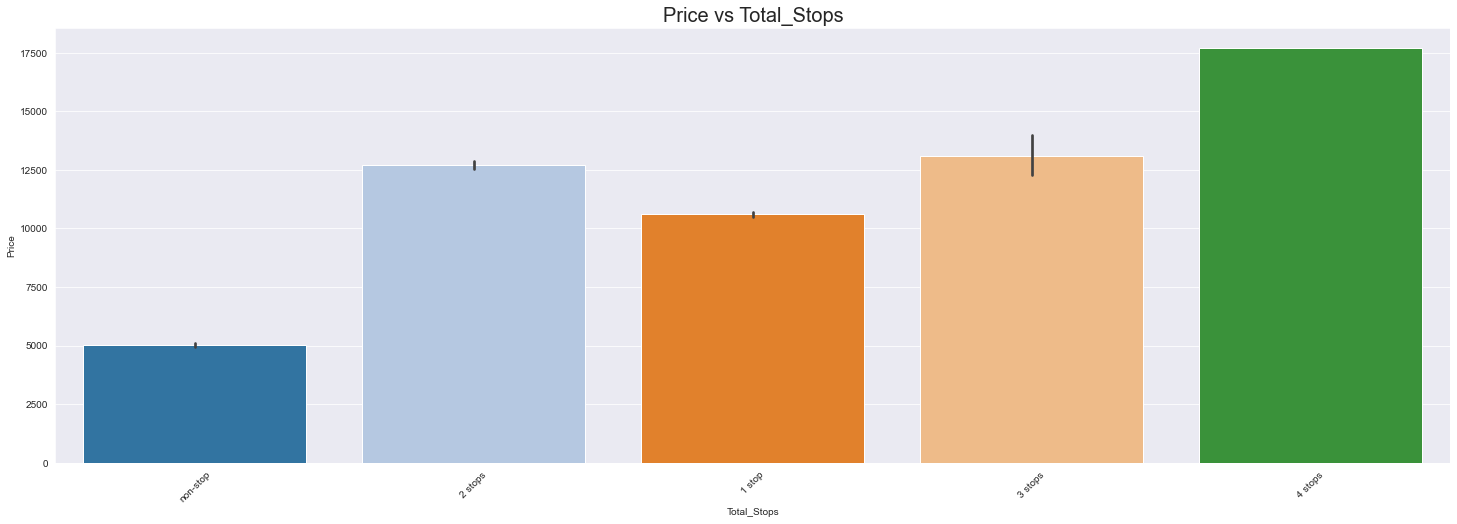

In [36]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    plt.figure(figsize=(25,8))
    sns.barplot(x=train_data[i],y=train_data.Price,palette='tab20')
    plt.title(f"Price vs {i}",fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

- Jet Airways buiness is the most expensive Airline as compared to other Airlines and Spicejet and trujet being the cheapest of all
- Flight prices are the highest if it is being boarded from Delhi followed by Kolkata and cheapest if boarded from Chennai
- Flight prices are highest if the Destination is New Delhi followed by Cochin with Kolkata being the cheapest.
- Flight prices are generally higher if the flight takes 4 stops followed by 3 stops and the price is least if the flight does not take any stops in between.

### Feature Engineering

#### Encoding categorical variable

In [37]:
train_data.select_dtypes('O')

,Airline,Source,Destination,Total_Stops
0,IndiGo,Banglore,New Delhi,non-stop
1,Air India,Kolkata,Banglore,2 stops
2,Jet Airways,Delhi,Cochin,2 stops
3,IndiGo,Kolkata,Banglore,1 stop
4,IndiGo,Banglore,New Delhi,1 stop
...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop
10679,Air India,Kolkata,Banglore,non-stop
10680,Jet Airways,Banglore,Delhi,non-stop
10681,Vistara,Banglore,New Delhi,non-stop


In [38]:
# since Total Stops is a ordinal variable will be mapping its values in an order
train_data.Total_Stops=train_data.Total_Stops.map({"non-stop": 0, "1 stop": 1, "2 stops": 2, 
                                                   "3 stops": 3, "4 stops": 4}) 


# Since Airline, Source and Destination are nominal variables will be applying dummy encoding 
train_encoded = pd.get_dummies(data=train_data,columns=['Airline','Source','Destination'],drop_first=True) 

In [39]:
train_encoded.head()

,Total_Stops,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


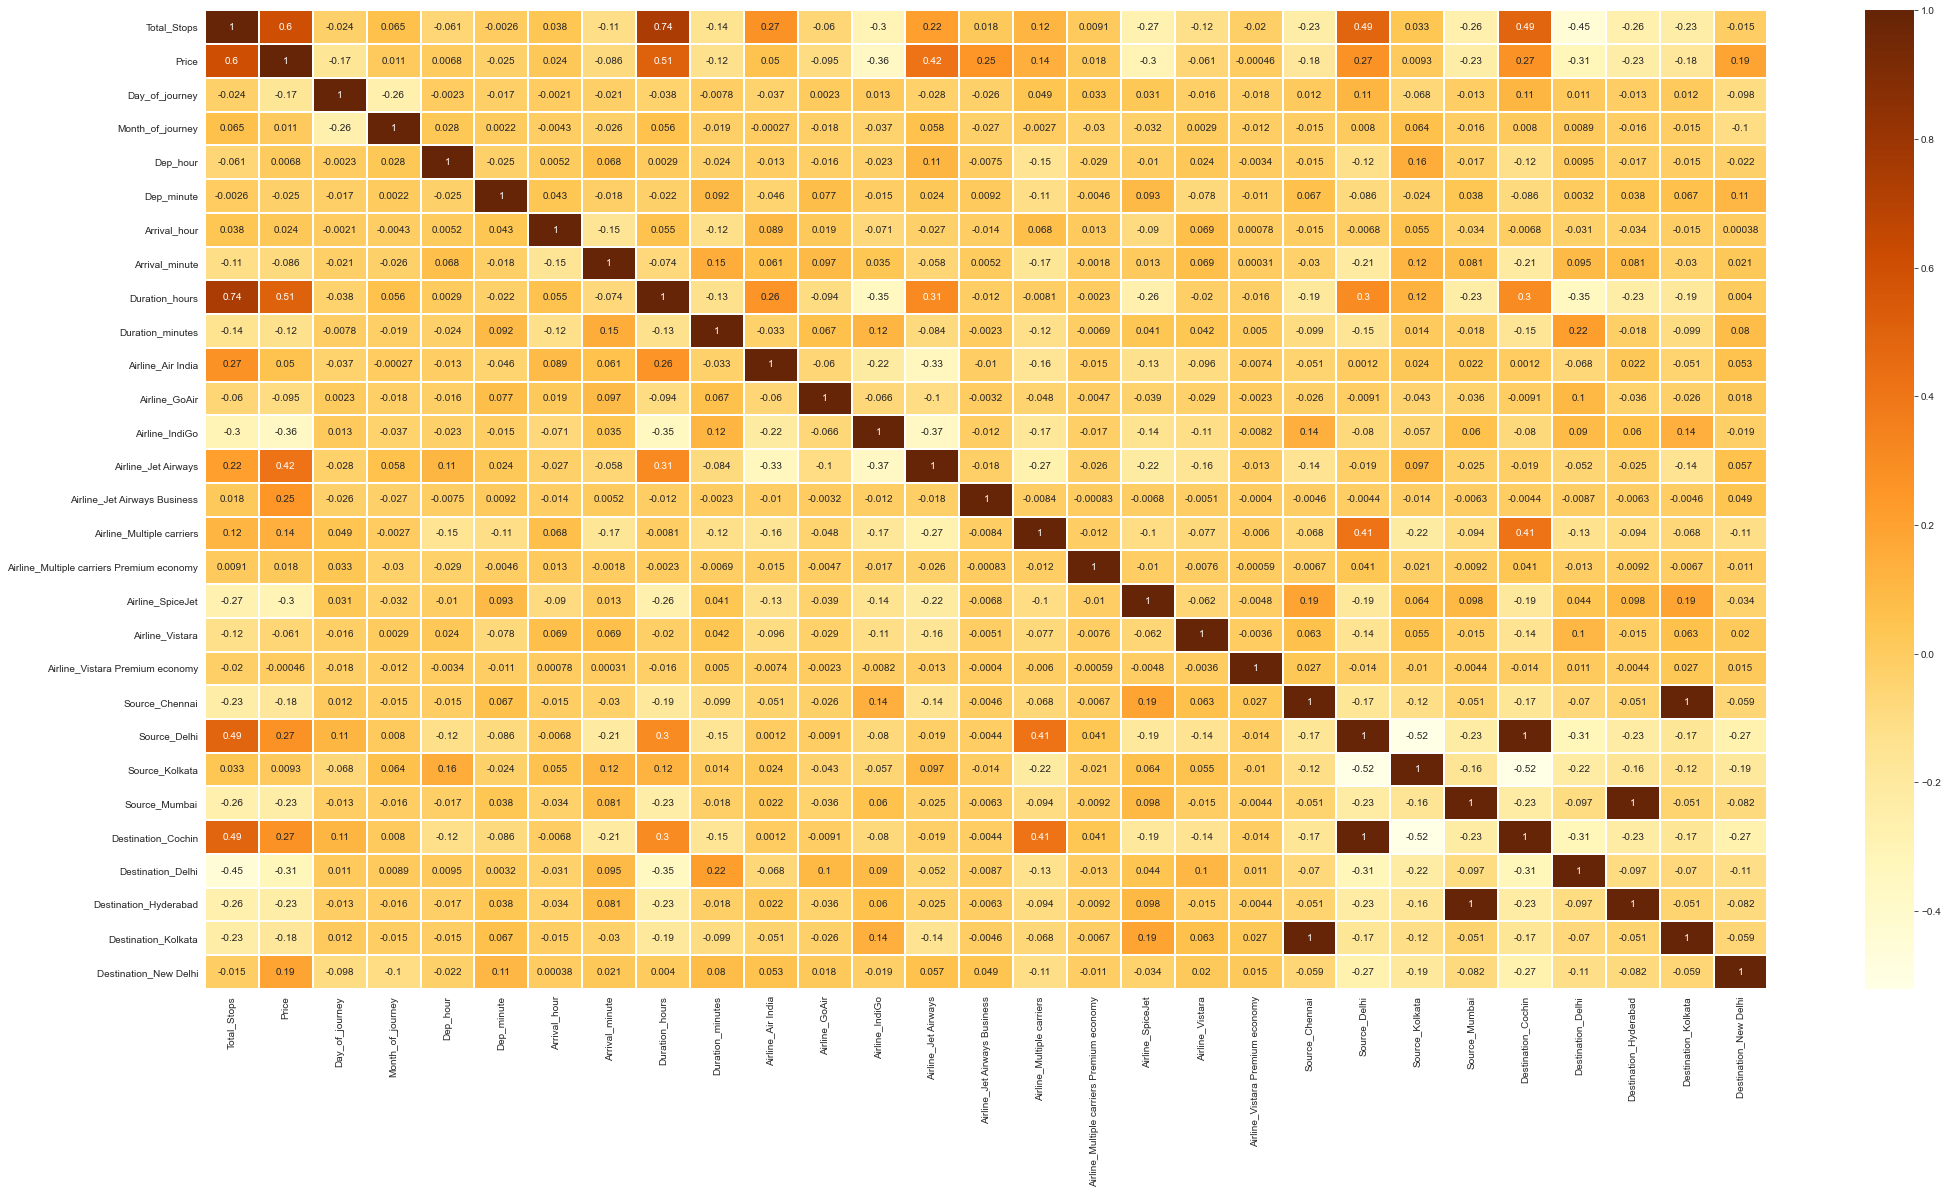

In [40]:
# checking correlation 
plt.figure(figsize=(35,18))
sns.heatmap(train_encoded.corr(),annot=True,cmap='YlOrBr',linewidths=1)
plt.show()

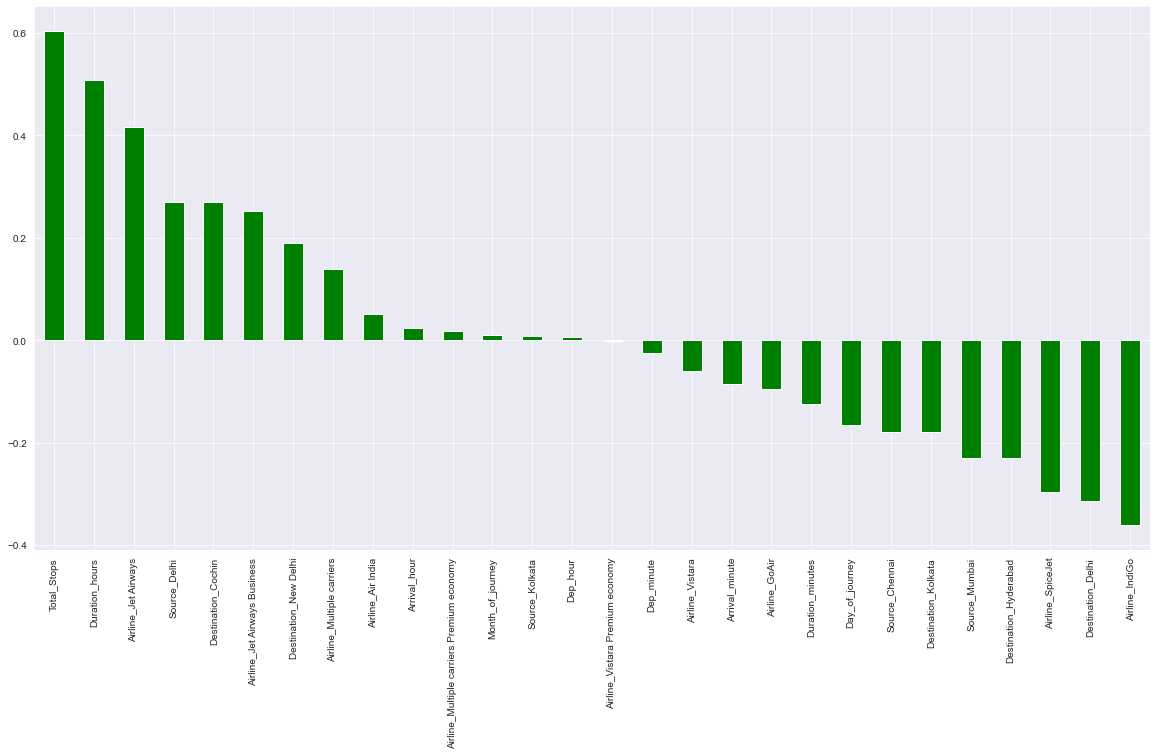

In [41]:
# checking correlation with respect to target variable
plt.figure(figsize=(20,10))
train_encoded.corr().Price.sort_values(ascending=False).drop('Price').plot.bar(color='g')
plt.show()

From above plots we can see some of the independent variables are highly correlated with each other. So will be removing the variables with weakest strength with target variable.

In [42]:
# removing multicolinearity 
train_encoded.drop(['Destination_Kolkata','Destination_Cochin','Source_Mumbai'],axis=1,inplace=True)

#### Scaling

In [43]:
# splitting into dependent and independent variables
x = train_encoded.drop(['Price'],axis=1)
y = train_encoded.Price

In [44]:
# Will be scaling the independent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Total_Stops,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,0.00,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.50,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.25,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0.00,0.041667,0.727273,0.826087,1.000000,0.956522,0.454545,0.042553,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10677,0.00,1.000000,0.272727,0.869565,0.818182,1.000000,0.363636,0.042553,0.636364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10678,0.00,1.000000,0.272727,0.347826,0.363636,0.478261,0.363636,0.063830,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10679,0.00,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,0.042553,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Selection

In [45]:
# performing train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size = 0.30, random_state = 1)

In [46]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(xtrain,ytrain)
mutual_info

array([0.76644611, 0.5609555 , 0.40571241, 0.84390514, 0.70252051,
       1.07118857, 0.85503399, 1.06490217, 0.63476787, 0.27088368,
       0.03718213, 0.3478281 , 0.52777254, 0.        , 0.24966787,
       0.00545483, 0.20075046, 0.13164261, 0.        , 0.12336551,
       0.49787218, 0.43422897, 0.30700175, 0.20845729, 0.16089275])

In [47]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

Arrival_hour                                 1.071189
Duration_hours                               1.064902
Arrival_minute                               0.855034
Dep_hour                                     0.843905
Total_Stops                                  0.766446
Dep_minute                                   0.702521
Duration_minutes                             0.634768
Day_of_journey                               0.560955
Airline_Jet Airways                          0.527773
Source_Delhi                                 0.497872
Source_Kolkata                               0.434229
Month_of_journey                             0.405712
Airline_IndiGo                               0.347828
Destination_Delhi                            0.307002
Airline_Air India                            0.270884
Airline_Multiple carriers                    0.249668
Destination_Hyderabad                        0.208457
Airline_SpiceJet                             0.200750
Destination_New Delhi       

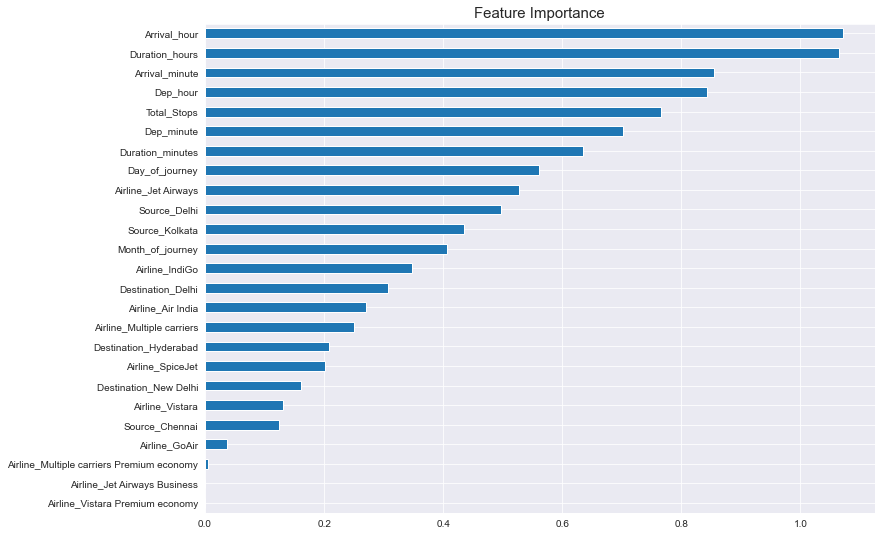

In [48]:
plt.title("Feature Importance",fontsize=15)
mutual_info.sort_values().plot(kind='barh',figsize=(12,9))
plt.show()

In [49]:
from sklearn.feature_selection import SelectPercentile

#selecting top 70 percentile
selected_cols = SelectPercentile(mutual_info_regression,70)
selected_cols.fit(xtrain,ytrain)

SelectPercentile(percentile=70,
                 score_func=<function mutual_info_regression at 0x11fce6670>)

In [50]:
selected_cols.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True,  True, False])

In [51]:
xtrain.columns[selected_cols.get_support()]

Index(['Total_Stops', 'Day_of_journey', 'Month_of_journey', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Source_Delhi',
       'Source_Kolkata', 'Destination_Delhi', 'Destination_Hyderabad'],
      dtype='object')

### Model Buliding 

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
# intialising all the models
LR = LinearRegression()
KNN = KNeighborsRegressor()
SV = SVR()
DTR = DecisionTreeRegressor()
RTF = RandomForestRegressor()
ADB = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [54]:
# list of model name and instances
models = [("Linear Regression ",LR),
          ("K Nearest Neighbor Regressor ",KNN),
          ("Support Vector Regressor ",SV),
          ("Decision Tree Regressor ",DTR),
          ("Random forest Regressor ",RTF),
          ("AdaBoost Regressor ",ADB),
          ("Gradient Boosting Regressor ",GB)]

##### Training the models 

In [55]:
for name,model in models:
    model.fit(xtrain,ytrain)
    print(name," trained")

Linear Regression   trained
K Nearest Neighbor Regressor   trained
Support Vector Regressor   trained
Decision Tree Regressor   trained
Random forest Regressor   trained
AdaBoost Regressor   trained
Gradient Boosting Regressor   trained


##### Evaluating the models

****** Linear Regression  ******
Train score : 0.6310537874171815
Test score : 0.5848414019803414
Test error :-
Mean absolute error: 1977.2730235606502
Mean squared error: 8585499.245653965
Root Mean Squared Error: 2930.1022585660667


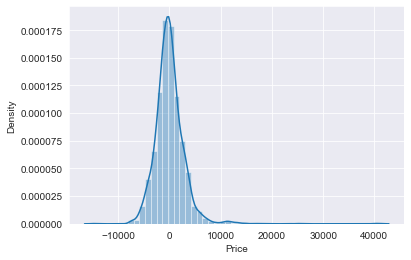

****** K Nearest Neighbor Regressor  ******
Train score : 0.8219545906015767
Test score : 0.6906719612483466
Test error :-
Mean absolute error: 1584.0878003120126
Mean squared error: 6396918.32478003
Root Mean Squared Error: 2529.21298525451


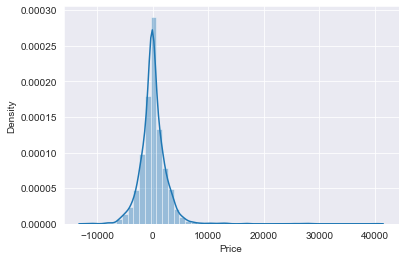

****** Support Vector Regressor  ******
Train score : 0.04725524863455988
Test score : 0.04861368308049785
Test error :-
Mean absolute error: 3386.741697354344
Mean squared error: 19674713.57982357
Root Mean Squared Error: 4435.618736977241


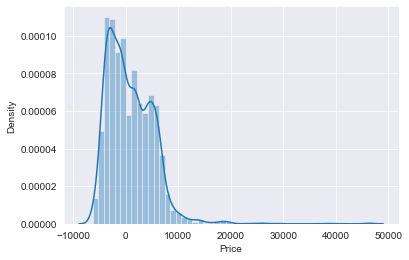

****** Decision Tree Regressor  ******
Train score : 0.9742059992784828
Test score : 0.6354614227919565
Test error :-
Mean absolute error: 1406.4555330213207
Mean squared error: 7538674.845132865
Root Mean Squared Error: 2745.6647364769183


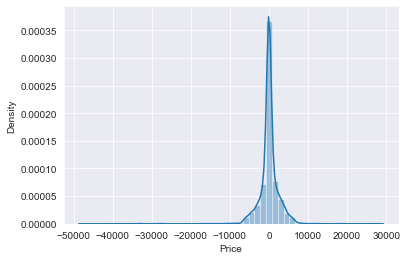

****** Random forest Regressor  ******
Train score : 0.9566493992047783
Test score : 0.7846712664063653
Test error :-
Mean absolute error: 1211.6472316968436
Mean squared error: 4453008.292865068
Root Mean Squared Error: 2110.215224299424


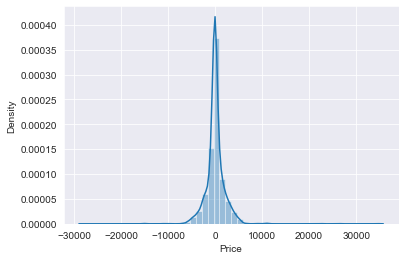

****** AdaBoost Regressor  ******
Train score : 0.27298828017524923
Test score : 0.18319174528714188
Test error :-
Mean absolute error: 3373.8428767062333
Mean squared error: 16891632.95215943
Root Mean Squared Error: 4109.943181135164


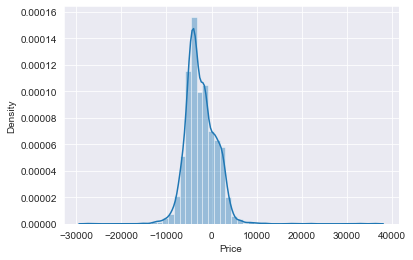

****** Gradient Boosting Regressor  ******
Train score : 0.8073097582296318
Test score : 0.753351203793553
Test error :-
Mean absolute error: 1509.6304906089451
Mean squared error: 5100708.654169885
Root Mean Squared Error: 2258.474851347671


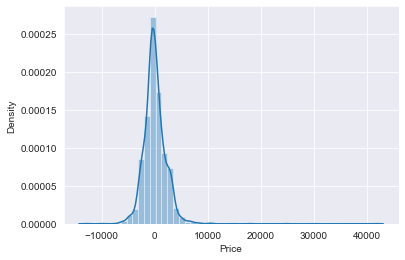

In [56]:

for name,model in models:
    print("******",name,"******")
    pred=model.predict(xtest)
    print("Train score :",model.score(xtrain,ytrain))
    print("Test score :",model.score(xtest,ytest))
    
    print('Test error :-')
    print('Mean absolute error:', mean_absolute_error(ytest,pred))
    print('Mean squared error:', mean_squared_error(ytest,pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,pred)))
    sns.distplot(ytest-pred)
    plt.show()

In [57]:
# checking cross validation score
for name,model in models:
    print("******",name,"******")
    crossval= -(cross_val_score(model,x_scaled,y,scoring='neg_root_mean_squared_error',cv=5).mean())
    print(crossval)

****** Linear Regression  ******
2860.041388324917
****** K Nearest Neighbor Regressor  ******
2466.0855814713595
****** Support Vector Regressor  ******
4477.6047206066305
****** Decision Tree Regressor  ******
2535.372792770503
****** Random forest Regressor  ******
2031.5029495481394
****** AdaBoost Regressor  ******
3808.6366208070795
****** Gradient Boosting Regressor  ******
2179.144811938092


Will be selecting Gradient bosst as the best model because it is outperforming all other models and in the case of random forest model although it has good evaluation scores than GBregressor but the random forest is not generalised model whereas gradient boost is a generalised model for this problem statement with good evaluation scores following bias variance trade-off also the distribution plot shows that the predicted values don't vary much and are normally distributed. Will be proceeding to Hypertune the model.

### Hyperparameter tuning

In [58]:
# parameter grid 
grid_param = {'learning_rate':[0.01,0.05,0.1],
              'max_depth':np.arange(2,12),
              'max_features':['auto', 'sqrt', 'log2'],
              'n_estimators':np.arange(50,200,50),
              'min_samples_leaf':np.arange(30,71,10),
               }
# using randomized search cv for grid search to find best parameters 
grid_search = RandomizedSearchCV(GB,grid_param,cv=5,verbose=5)
grid_search.fit(xtrain,ytrain)
# best parameters 
grid_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=70, n_estimators=150;, score=0.763 total time=   0.4s
[CV 2/5] END learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=70, n_estimators=150;, score=0.746 total time=   0.4s
[CV 3/5] END learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=70, n_estimators=150;, score=0.769 total time=   0.4s
[CV 4/5] END learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=70, n_estimators=150;, score=0.792 total time=   0.4s
[CV 5/5] END learning_rate=0.05, max_depth=6, max_features=log2, min_samples_leaf=70, n_estimators=150;, score=0.657 total time=   0.4s
[CV 1/5] END learning_rate=0.05, max_depth=9, max_features=auto, min_samples_leaf=50, n_estimators=100;, score=0.779 total time=   1.3s
[CV 2/5] END learning_rate=0.05, max_depth=9, max_features=auto, min_samples_leaf=50, n_estimators=100;, score=0.784 total 

{'n_estimators': 150,
 'min_samples_leaf': 60,
 'max_features': 'sqrt',
 'max_depth': 10,
 'learning_rate': 0.1}

In [59]:
# checking best estimators
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=10, max_features='sqrt',
                          min_samples_leaf=60, n_estimators=150)

In [60]:
# tuning the model with best estimators
final_model = GradientBoostingRegressor(max_depth=10, max_features='sqrt',
                          min_samples_leaf=60, n_estimators=150)
final_model.fit(xtrain,ytrain)
final_pred = final_model.predict(xtest)

Train score : 0.8618554460273639
Test score : 0.795240573783849
R2 score : 0.795240573783849
Mean absolute error: 1289.4573523523954
Mean squared error: 4234434.521421281
Root Mean Squared Error: 2057.774166768861


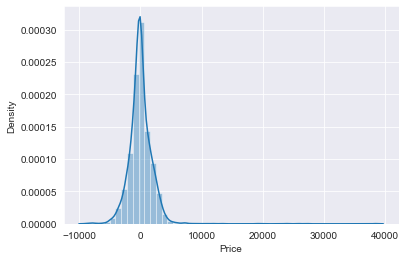

In [61]:
# Evaluating the Tuned Model 
print("Train score :",final_model.score(xtrain,ytrain))
print("Test score :",final_model.score(xtest,ytest))
print("R2 score :",r2_score(ytest, final_pred))
print('Mean absolute error:', mean_absolute_error(ytest,final_pred))
print('Mean squared error:', mean_squared_error(ytest,final_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,final_pred)))
sns.distplot(ytest-final_pred)
plt.show()

### Preprocessing Test data

Will be repeating all the pre-processing steps done for test data in the exact same manner as it was done for train data

In [62]:
test_df.shape

(2671, 10)

In [63]:
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [65]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [66]:
date_time_cols = ['Date_of_Journey','Dep_Time','Arrival_Time']
for i in date_time_cols:
    test_df[i] = pd.to_datetime(test_df[i])
 

In [67]:
print(test_df.dtypes)   

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object


In [68]:
test_df['Day_of_journey'] = pd.DatetimeIndex(test_df.Date_of_Journey).day
test_df['Month_of_journey'] = pd.DatetimeIndex(test_df.Date_of_Journey).month

In [69]:
test_data = test_df.drop(['Date_of_Journey'],axis=1)

In [70]:
test_data['Dep_hour'] = pd.DatetimeIndex(test_data.Dep_Time).hour
test_data['Dep_minute'] = pd.DatetimeIndex(test_data.Dep_Time).minute
test_data['Arrival_hour'] = pd.DatetimeIndex(test_data.Arrival_Time).hour
test_data['Arrival_minute'] = pd.DatetimeIndex(test_data.Arrival_Time).minute
test_data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [71]:
dur = list(test_data.Duration)

for i in range(len(dur)):
    if len(dur[i].split()) != 2:   
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"  
        else:
            dur[i] = "0h " + dur[i]          

dur_hours = []
dur_minutes = []
for i in range(len(dur)):
    dur_hours.append(int(dur[i].split(sep = "h")[0])) 
    dur_minutes.append(int(dur[i].split(sep = "m")[0].split()[-1]))  
    
test_data['Duration_hours'] = dur_hours
test_data['Duration_minutes'] = dur_minutes
test_data.drop(['Duration'],axis=1,inplace=True)

In [72]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [73]:
test_data.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Day_of_journey      0
Month_of_journey    0
Dep_hour            0
Dep_minute          0
Arrival_hour        0
Arrival_minute      0
Duration_hours      0
Duration_minutes    0
dtype: int64

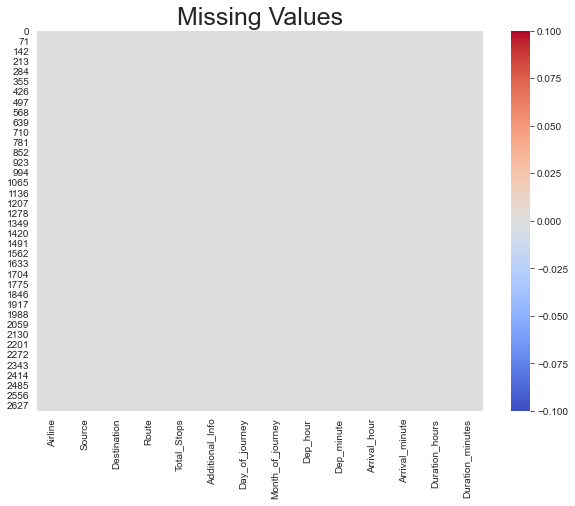

In [74]:
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(test_data.isnull(),cmap='coolwarm')
plt.show()

In [75]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [76]:
test_data.Total_Stops=test_data.Total_Stops.map({"non-stop": 0, "1 stop": 1, "2 stops": 2, 
                                                 "3 stops": 3, "4 stops": 4})

test_encoded = pd.get_dummies(data=test_data,columns=['Airline','Source','Destination'],drop_first=True )

In [77]:
test_data.select_dtypes('O')

,Airline,Source,Destination
0,Jet Airways,Delhi,Cochin
1,IndiGo,Kolkata,Banglore
2,Jet Airways,Delhi,Cochin
3,Multiple carriers,Delhi,Cochin
4,Air Asia,Banglore,Delhi
...,...,...,...
2666,Air India,Kolkata,Banglore
2667,IndiGo,Kolkata,Banglore
2668,Jet Airways,Delhi,Cochin
2669,Air India,Delhi,Cochin


In [78]:
test_encoded.head()

,Total_Stops,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


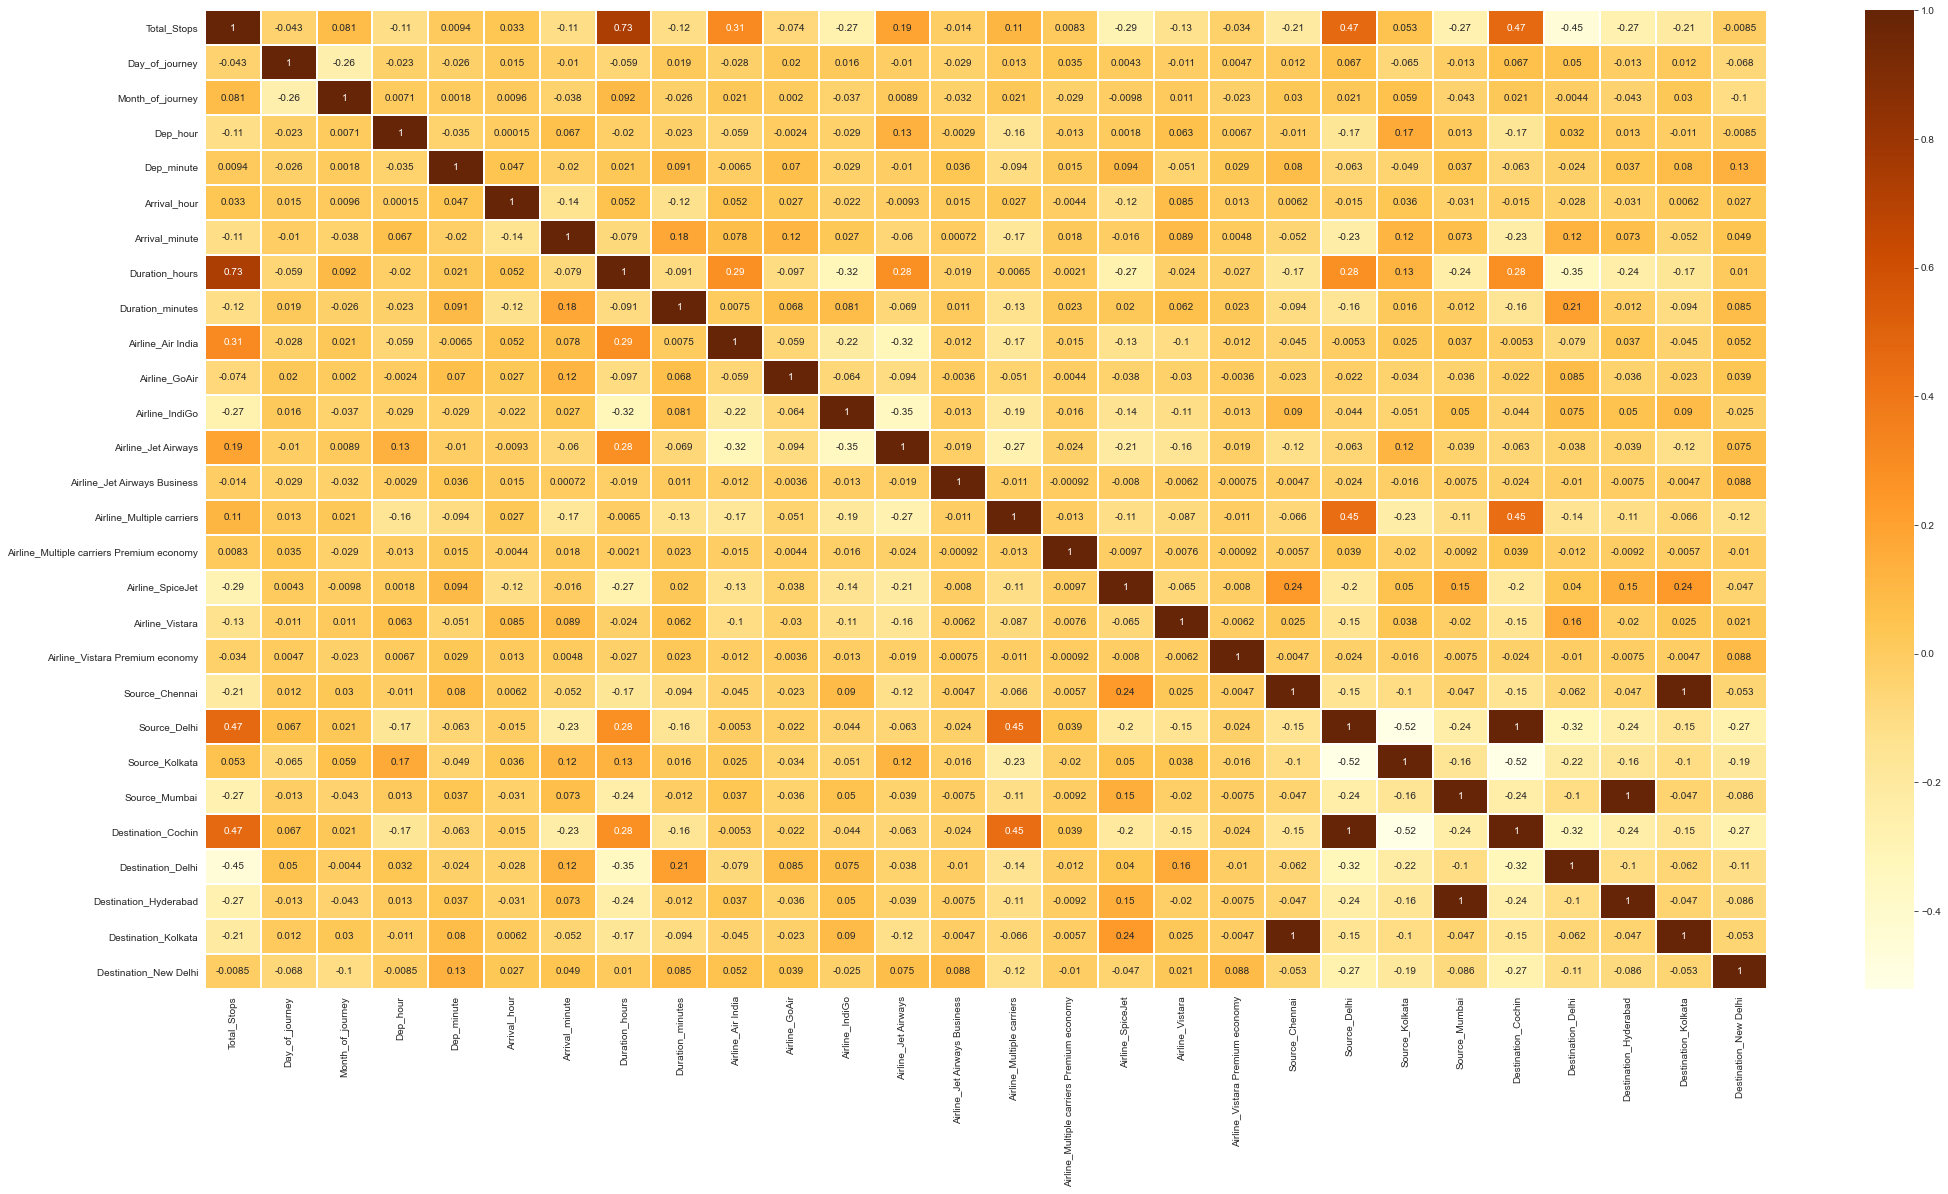

In [79]:
plt.figure(figsize=(35,18))
sns.heatmap(test_encoded.corr(),annot=True,cmap='YlOrBr',linewidths=1)
plt.show()

In [80]:
test_encoded.drop(['Destination_Kolkata','Destination_Cochin','Source_Mumbai'],axis=1,inplace=True)

In [81]:
scaled = scaler.fit_transform(test_encoded)
scaled = pd.DataFrame(scaled, columns=test_encoded.columns)
scaled

,Total_Stops,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,0.25,0.125000,0.454545,0.739130,0.545455,0.173913,0.454545,0.250,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.25,0.083333,1.000000,0.260870,0.363636,0.434783,0.363636,0.100,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.25,0.750000,0.363636,0.826087,0.272727,0.826087,0.000000,0.575,0.818182,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.25,0.750000,0.363636,0.347826,0.000000,0.913043,0.000000,0.325,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.00,0.875000,0.454545,1.000000,1.000000,0.086957,0.818182,0.050,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.25,0.125000,0.454545,0.869565,0.545455,0.869565,0.454545,0.575,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2667,0.00,1.000000,0.181818,0.608696,0.363636,0.695652,1.000000,0.050,0.636364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2668,0.25,0.000000,0.454545,0.913043,0.909091,0.173913,0.454545,0.150,0.636364,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2669,0.25,0.000000,0.454545,0.173913,0.000000,0.826087,0.272727,0.375,0.272727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
train_encoded.columns

Index(['Total_Stops', 'Price', 'Day_of_journey', 'Month_of_journey',
       'Dep_hour', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_New Delhi'],
      dtype='object')

In [83]:
test_encoded.columns

Index(['Total_Stops', 'Day_of_journey', 'Month_of_journey', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_New Delhi'],
      dtype='object')

#### Predicting price for Test data

In [84]:
prediction = final_model.predict(test_encoded)
prediction

array([11009.35858338,  9812.43853945, 12129.94036706, ...,
       11009.35858338, 10346.15734619, 11091.03177113])

In [85]:
df=pd.DataFrame({'Price':prediction})
predicted_flight_prices = pd.concat([test_encoded,df],axis=1)
predicted_flight_prices

,Total_Stops,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi,Price
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,11009.358583
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,9812.438539
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,12129.940367
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,11921.329581
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6203.036403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12097.122452
2667,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,6320.704159
2668,1,3,6,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,11009.358583
2669,1,3,6,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10346.157346


### Saving Model

In [86]:
import joblib
joblib.dump(final_model,'flight_price.pkl')

['flight_price.pkl']